### Reference Architecture
https://towardsdatascience.com/transformers-explained-visually-part-3-multi-head-attention-deep-dive-1c1ff1024853

## 0. Load inputs from last step

In [1]:
import torch

/Users/sharmilisrinivasan/miniconda3/envs/llm_from_scratch_py312/lib/python3.12/site-packages/torch/_subclasses/functional_tensor.py:295: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:84.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


In [2]:
input = torch.load("intermediate_values/layer_norm_1_output.pt")

/var/folders/5c/l1syhclx3zl_4b_g5t_hl9tc0000gn/T/ipykernel_47123/328868356.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  input = torch.load("intermediate_values/layer_

In [6]:
print(input[0,:,:])
batch_size, in_seq_len, emd_dim = input.shape
input.shape  # batch_size * in_seq_len * emd_dim

tensor([[ 1.1343, -0.5984,  1.3264,  1.0636, -1.2192, -0.2838, -0.7661, -1.2127,
         -0.6400,  1.1960],
        [ 0.4412, -2.5600, -0.1102,  0.7108, -0.3184, -0.5975, -0.0687,  1.1527,
          0.8007,  0.5493],
        [-1.4918,  0.2425,  0.8563, -0.9159,  0.8554,  0.2970,  1.7789, -0.4308,
          0.1991, -1.3906],
        [-0.4218, -0.8389,  1.7862, -1.4180, -0.6316, -0.4544,  0.1798,  0.1230,
         -0.1266,  1.8022],
        [ 0.1991, -0.0869, -0.1412, -1.8910,  0.5172,  1.4262,  1.1456, -0.4936,
         -1.4034,  0.7280],
        [-1.4083, -0.0112, -0.3050,  1.8640, -0.8031,  1.1025, -1.1941,  0.7568,
         -0.5440,  0.5423],
        [-0.8214,  1.0631,  0.1701,  0.2378, -2.0257, -0.6605,  0.7200,  1.7191,
         -0.2879, -0.1146]], grad_fn=<SliceBackward0>)


torch.Size([3, 7, 10])

## 1. Linear Layers
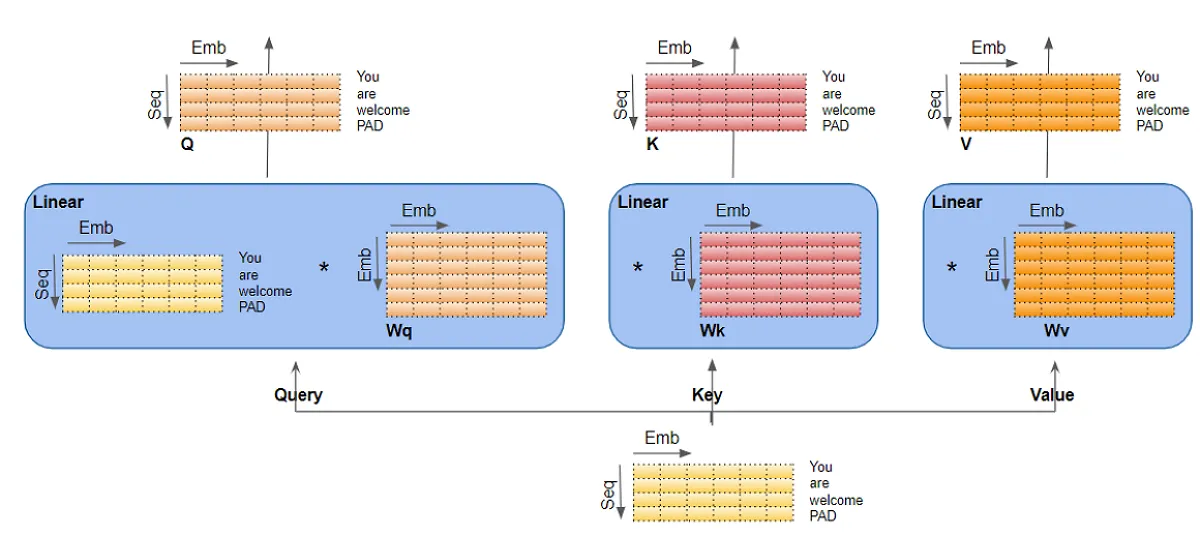

In [8]:
import torch.nn as nn

In [72]:
qkv_bias = False  # Skipping bias terms to make the transformers training faster

In [10]:
W_query = nn.Linear(emd_dim, emd_dim, bias=qkv_bias)  # emd_dim * emd_dim
W_key = nn.Linear(emd_dim, emd_dim, bias=qkv_bias)  # emd_dim * emd_dim
W_value = nn.Linear(emd_dim, emd_dim, bias=qkv_bias)  # emd_dim * emd_dim

In [11]:
keys = W_key(input)
print(keys[0,:,:])
keys.shape  # batch_size * in_seq_len * emd_dim

tensor([[-0.5431, -1.8142,  0.1474,  0.3655,  0.3191, -0.4866,  0.3292,  0.0551,
         -0.1969, -0.5283],
        [-0.6180, -0.4576,  1.2937,  0.6864, -0.4827,  0.1636,  0.5528, -0.5034,
          0.0174, -1.3705],
        [-0.3027,  1.5805, -0.6505, -0.8258, -0.2525,  0.6081,  0.5961, -0.3290,
          0.3564,  1.2284],
        [-1.2815, -0.7575,  0.1549,  0.1964, -1.0563, -0.1814,  0.7534, -0.0699,
         -0.0534,  0.1250],
        [-0.3149,  0.6316, -0.0089,  0.3048,  0.8888,  0.5010,  0.6780,  0.2731,
          0.5517,  0.6601],
        [ 0.0118, -0.4290,  0.1607,  0.8388,  0.0542, -1.2319, -0.8810, -0.3760,
         -0.8496, -0.0436],
        [-0.6287, -0.3428,  0.6888, -0.8328, -1.0538, -0.7849, -1.2726,  0.0773,
         -0.7648, -0.1095]], grad_fn=<SliceBackward0>)


torch.Size([3, 7, 10])

In [12]:
queries = W_query(input)
print(queries[0,:,:])
queries.shape  # batch_size * in_seq_len * emd_dim

tensor([[-0.8816, -1.3817, -0.3103, -0.2465, -0.0936, -0.1426,  0.3166, -0.1132,
          0.3708,  0.6712],
        [ 0.0801, -0.7707, -0.0670, -0.2212,  0.6823, -0.2416, -0.6865, -0.8651,
          0.2403, -0.2658],
        [ 0.4124,  1.1298,  0.2584, -0.0354, -0.3947, -0.7234,  0.5464,  0.2240,
         -0.8392, -0.2167],
        [-1.2029, -0.1276,  0.1036, -0.4302, -0.3202,  0.2923, -0.0360,  0.0973,
         -0.3126,  0.6014],
        [ 0.0087,  1.4302,  1.0905,  0.1971, -0.1379,  0.1522, -0.0317,  1.4168,
          0.2522, -0.8652],
        [ 0.0749,  0.0272, -0.3597,  0.5213, -0.9306,  0.6695, -1.0164, -0.9233,
         -0.4220,  0.8885],
        [-0.3530,  0.1283, -0.2462,  0.1510, -1.4558,  0.0343, -0.0656, -0.4584,
         -0.6409,  0.4178]], grad_fn=<SliceBackward0>)


torch.Size([3, 7, 10])

In [13]:
values = W_value(input)
print(values[0,:,:])
values.shape  # batch_size * in_seq_len * emd_dim

tensor([[ 0.6718, -0.2049, -0.0902, -0.0456, -0.1906,  0.0416,  1.0852,  0.0691,
          0.2283,  0.7541],
        [-0.0354,  0.7890, -0.9250,  0.4816, -0.0842,  0.0638,  1.1786, -0.6052,
         -0.0696,  0.4395],
        [-0.9137, -0.2124,  0.8100,  0.1716, -0.9172, -0.3136, -0.7444, -0.1587,
          0.3863,  0.2131],
        [ 0.0015,  0.3109, -0.2621, -0.1929, -0.4387, -1.0735,  0.8048, -0.7439,
          0.8393,  0.7120],
        [-0.0418, -0.0240, -0.5249, -0.2473, -0.4909, -0.8579, -0.7560, -0.1469,
          0.8678,  0.4783],
        [-0.2073, -0.4672,  0.0798,  0.5160,  0.5204,  0.6218,  0.2456,  0.7789,
          0.3813, -0.2201],
        [ 0.4970,  0.6930, -0.6609,  0.6916,  1.1170, -0.0290,  0.0734, -0.9842,
         -0.0303, -0.5011]], grad_fn=<SliceBackward0>)


torch.Size([3, 7, 10])

## 2. Split Embedding to multi-heads

In [20]:
num_heads = 2

assert emd_dim % num_heads == 0, "emd_dim must be divisible by num_heads"

head_dim = emd_dim // num_heads  # splitting emd_dim across all heads equally


We implicitly split the matrix by adding a `num_heads` dimension


Unroll last dim: (batch_size, in_seq_len, emd_dim) -> (batch_size, in_seq_len, num_heads, head_dim)

In [22]:
keys = keys.view(batch_size, in_seq_len, num_heads, head_dim)
print(keys[0,:,:])
keys.shape  # batch_size * in_seq_len * num_heads * head_dim

tensor([[[-0.5431, -1.8142,  0.1474,  0.3655,  0.3191],
         [-0.4866,  0.3292,  0.0551, -0.1969, -0.5283]],

        [[-0.6180, -0.4576,  1.2937,  0.6864, -0.4827],
         [ 0.1636,  0.5528, -0.5034,  0.0174, -1.3705]],

        [[-0.3027,  1.5805, -0.6505, -0.8258, -0.2525],
         [ 0.6081,  0.5961, -0.3290,  0.3564,  1.2284]],

        [[-1.2815, -0.7575,  0.1549,  0.1964, -1.0563],
         [-0.1814,  0.7534, -0.0699, -0.0534,  0.1250]],

        [[-0.3149,  0.6316, -0.0089,  0.3048,  0.8888],
         [ 0.5010,  0.6780,  0.2731,  0.5517,  0.6601]],

        [[ 0.0118, -0.4290,  0.1607,  0.8388,  0.0542],
         [-1.2319, -0.8810, -0.3760, -0.8496, -0.0436]],

        [[-0.6287, -0.3428,  0.6888, -0.8328, -1.0538],
         [-0.7849, -1.2726,  0.0773, -0.7648, -0.1095]]],
       grad_fn=<SliceBackward0>)


torch.Size([3, 7, 2, 5])

In [23]:
values = values.view(batch_size, in_seq_len, num_heads, head_dim)
print(values[0,:,:])
values.shape  # batch_size * in_seq_len * num_heads * head_dim

tensor([[[ 0.6718, -0.2049, -0.0902, -0.0456, -0.1906],
         [ 0.0416,  1.0852,  0.0691,  0.2283,  0.7541]],

        [[-0.0354,  0.7890, -0.9250,  0.4816, -0.0842],
         [ 0.0638,  1.1786, -0.6052, -0.0696,  0.4395]],

        [[-0.9137, -0.2124,  0.8100,  0.1716, -0.9172],
         [-0.3136, -0.7444, -0.1587,  0.3863,  0.2131]],

        [[ 0.0015,  0.3109, -0.2621, -0.1929, -0.4387],
         [-1.0735,  0.8048, -0.7439,  0.8393,  0.7120]],

        [[-0.0418, -0.0240, -0.5249, -0.2473, -0.4909],
         [-0.8579, -0.7560, -0.1469,  0.8678,  0.4783]],

        [[-0.2073, -0.4672,  0.0798,  0.5160,  0.5204],
         [ 0.6218,  0.2456,  0.7789,  0.3813, -0.2201]],

        [[ 0.4970,  0.6930, -0.6609,  0.6916,  1.1170],
         [-0.0290,  0.0734, -0.9842, -0.0303, -0.5011]]],
       grad_fn=<SliceBackward0>)


torch.Size([3, 7, 2, 5])

In [24]:
queries = queries.view(batch_size, in_seq_len, num_heads, head_dim)
print(queries[0,:,:])
queries.shape  # batch_size * in_seq_len * num_heads * head_dim

tensor([[[-0.8816, -1.3817, -0.3103, -0.2465, -0.0936],
         [-0.1426,  0.3166, -0.1132,  0.3708,  0.6712]],

        [[ 0.0801, -0.7707, -0.0670, -0.2212,  0.6823],
         [-0.2416, -0.6865, -0.8651,  0.2403, -0.2658]],

        [[ 0.4124,  1.1298,  0.2584, -0.0354, -0.3947],
         [-0.7234,  0.5464,  0.2240, -0.8392, -0.2167]],

        [[-1.2029, -0.1276,  0.1036, -0.4302, -0.3202],
         [ 0.2923, -0.0360,  0.0973, -0.3126,  0.6014]],

        [[ 0.0087,  1.4302,  1.0905,  0.1971, -0.1379],
         [ 0.1522, -0.0317,  1.4168,  0.2522, -0.8652]],

        [[ 0.0749,  0.0272, -0.3597,  0.5213, -0.9306],
         [ 0.6695, -1.0164, -0.9233, -0.4220,  0.8885]],

        [[-0.3530,  0.1283, -0.2462,  0.1510, -1.4558],
         [ 0.0343, -0.0656, -0.4584, -0.6409,  0.4178]]],
       grad_fn=<SliceBackward0>)


torch.Size([3, 7, 2, 5])

## 3. Transpose for further computation

In [25]:
print(keys.shape)  # Before: batch_size * in_seq_len * num_heads * head_dim
keys = keys.transpose(1, 2)
print(keys.shape)  # After: batch_size * num_heads * in_seq_len * head_dim

torch.Size([3, 7, 2, 5])
torch.Size([3, 2, 7, 5])


In [26]:
print(queries.shape)  # Before: batch_size * in_seq_len * num_heads * head_dim
queries = queries.transpose(1, 2)
print(queries.shape)  # After: batch_size * num_heads * in_seq_len * head_dim

torch.Size([3, 7, 2, 5])
torch.Size([3, 2, 7, 5])


In [27]:
print(values.shape)  # Before: batch_size * in_seq_len * num_heads * head_dim
values = values.transpose(1, 2)
print(values.shape)  # After: batch_size * num_heads * in_seq_len * head_dim

torch.Size([3, 7, 2, 5])
torch.Size([3, 2, 7, 5])


## 4. Self Attention
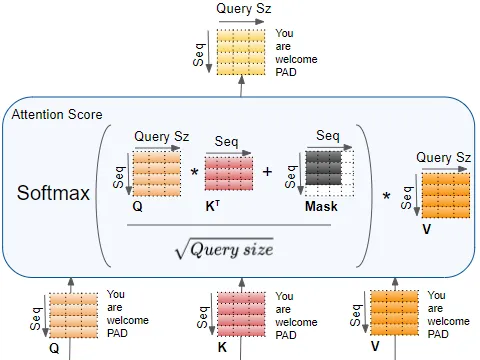

### 4.1. Self Attention
Output matrix will be input_seq by input_seq

In [29]:
# Transposing in_seq_len & head_dim => For output to be in_seq_len by in_seq_len per head
keys_transpose = keys.transpose(2, 3)
keys_transpose.shape  # batch_size * num_heads * head_dim * in_seq_len

torch.Size([3, 2, 5, 7])

In [30]:
# Dot product of queries and key at each head
self_attention_scores = queries @ keys_transpose
self_attention_scores.shape  # batch_size * num_heads * in_seq_len * in_seq_len

torch.Size([3, 2, 7, 7])

### 4.2 Preping the mask & Masking
Masking is used in "decoder" architecture to stop model from seeing into future information during training.

In [37]:
context_length = 9 # Context Length supported by the model; Actual value: 1024

In [41]:
# Upper Triangle with ones of context length is created; 
# Primary diagonal and below are marked zeros. 
# Note: 
# - diagonal=1 implies consider from one above primary diagonal; 
# - 0 will imply to include primary diagonal; 
# - -X will imply to consider X diagonals below primary diagonal
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
print(mask)
mask.shape  # context_length * context_length

tensor([[0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]])


torch.Size([9, 9])

In [43]:
 # Original mask truncated to the in_seq_len and converted to boolean
 mask_bool = mask.bool()[:in_seq_len, :in_seq_len]
 print(mask_bool)
 mask_bool.shape  # in_seq_len * in_seq_len

tensor([[False,  True,  True,  True,  True,  True,  True],
        [False, False,  True,  True,  True,  True,  True],
        [False, False, False,  True,  True,  True,  True],
        [False, False, False, False,  True,  True,  True],
        [False, False, False, False, False,  True,  True],
        [False, False, False, False, False, False,  True],
        [False, False, False, False, False, False, False]])


torch.Size([7, 7])

In [45]:
# Use Mask and fill masked areas with "-inf"
print(self_attention_scores[0,:,:,:])
self_attention_scores.masked_fill_(mask_bool, -torch.inf)

tensor([[[ 2.8198,  0.6517, -1.4878,  2.1789, -0.7506,  0.3206,  1.1181],
         [ 1.4817, -0.2647, -1.1884, -0.2935,  0.0276,  0.1722, -0.3671],
         [-2.3746, -0.2714,  1.6217, -0.9343,  0.2199, -0.4894, -0.0232],
         [ 0.6407,  0.7951,  0.5312,  1.9079, -0.1185, -0.3210,  1.5671],
         [-2.4107,  0.9527,  1.4205, -0.7413,  0.8285, -0.2803,  0.2365],
         [-0.2494,  0.2830,  0.0587,  0.9132, -0.6715,  0.3183,  0.2424],
         [-0.4868,  0.6473,  0.7128,  1.8846, -1.0535, -0.0509,  1.4167]],

        [[-0.2602, -0.7048,  1.0959,  0.3364,  0.7599, -0.4050, -0.6568],
         [-0.0630,  0.3849, -0.5124, -0.4589, -0.8657,  1.0352,  0.8418],
         [ 0.8240,  0.3534, -0.7531,  0.5449, -0.5368,  1.0479,  0.5553],
         [-0.4049, -0.8507,  0.7516,  0.0050,  0.3731, -0.1255, -0.0029],
         [ 0.4010,  0.4842, -1.3654, -0.2722,  0.0098, -0.8689, -0.0678],
         [-1.0976, -1.2126,  1.0460, -0.6890, -0.2522,  0.7378,  0.9221],
         [-0.1581, -0.3837,  0.4174,

tensor([[[[ 2.8198,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf],
          [ 1.4817, -0.2647,    -inf,    -inf,    -inf,    -inf,    -inf],
          [-2.3746, -0.2714,  1.6217,    -inf,    -inf,    -inf,    -inf],
          [ 0.6407,  0.7951,  0.5312,  1.9079,    -inf,    -inf,    -inf],
          [-2.4107,  0.9527,  1.4205, -0.7413,  0.8285,    -inf,    -inf],
          [-0.2494,  0.2830,  0.0587,  0.9132, -0.6715,  0.3183,    -inf],
          [-0.4868,  0.6473,  0.7128,  1.8846, -1.0535, -0.0509,  1.4167]],

         [[-0.2602,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf],
          [-0.0630,  0.3849,    -inf,    -inf,    -inf,    -inf,    -inf],
          [ 0.8240,  0.3534, -0.7531,    -inf,    -inf,    -inf,    -inf],
          [-0.4049, -0.8507,  0.7516,  0.0050,    -inf,    -inf,    -inf],
          [ 0.4010,  0.4842, -1.3654, -0.2722,  0.0098,    -inf,    -inf],
          [-1.0976, -1.2126,  1.0460, -0.6890, -0.2522,  0.7378,    -inf],
          [-0.1581, -0.

### 4.3 Scaling the self-attention
https://paperswithcode.com/method/scaled

Scaled dot-product attention is an attention mechanism where the dot products are scaled down by sqrt(dk)

In [50]:
# Get number of elements per head and take square root for denominator of scaling
denominator = keys.shape[-1] ** 0.5
denominator

2.23606797749979

In [52]:
# scaled value = self_attention_scores / sq_root(#dim per head)
scaled_self_attention_scores = self_attention_scores / denominator
scaled_self_attention_scores.shape  # batch_size * num_heads * in_seq_len * in_seq_len

torch.Size([3, 2, 7, 7])

## 5. Final Attention Weights
dropout(softmax(Scaled Attention Scores)) * values

### 5.1 Softmax

In [54]:
softmax_scaled_self_attention_scores = torch.softmax(scaled_self_attention_scores, dim=-1)
softmax_scaled_self_attention_scores.shape  # batch_size * num_heads * in_seq_len * in_seq_len

torch.Size([3, 2, 7, 7])

### 5.2 Dropout

In [55]:
drop_rate = 0.0  # Keeping it zero. Can be tried with smaller prob number
dropout = nn.Dropout(drop_rate)

In [56]:
dropout_softmax_scaled_self_attention_scores = dropout(softmax_scaled_self_attention_scores)
dropout_softmax_scaled_self_attention_scores.shape  # batch_size * num_heads * in_seq_len * in_seq_len

torch.Size([3, 2, 7, 7])

### 5.3 Attention Weights

In [58]:
values.shape  # batch_size * num_heads * in_seq_len * head_dim

torch.Size([3, 2, 7, 5])

In [60]:
attention_weights = dropout_softmax_scaled_self_attention_scores @ values  # Dot product
attention_weights.shape  # batch_size * num_heads * in_seq_len * head_dim

torch.Size([3, 2, 7, 5])

## 6. Reshapes

### 6.1 Reverse Swap of heads and in_seq_len

In [62]:
context_vector = attention_weights.transpose(1,2)
context_vector.shape  # batch_size * in_seq_len * num_heads * head_dim

torch.Size([3, 7, 2, 5])

#### Note for context_vector.contiguous
Makes a copy of the tensor such that the order of its elements in memory is the same as if it had been created from scratch with the same data.

### 6.2 Merge heads 
To form batch_size * in_seq_len * original emd_dim

In [65]:
context_vector = context_vector.contiguous().view(batch_size, in_seq_len, emd_dim)
context_vector.shape  # batch_size * in_seq_len * emb_dim

torch.Size([3, 7, 10])

## 7. Final Linear layer before return (Optional)

In [69]:
out_projection = nn.Linear(emd_dim, emd_dim)  # Linear layer to combine head outputs

In [70]:
context_vector_to_return = out_projection(context_vector)
context_vector_to_return.shape  # batch_size * in_seq_len * emb_dim

torch.Size([3, 7, 10])

## 8. Save to carry forward

In [71]:
torch.save(context_vector_to_return,"intermediate_values/multi_head_attention_output.pt")